AUTOENCODER ON EXTRACTED FEATURES workbook



In [3]:
#activate conda env AutencoderTF env tf '2.10.0' , python 3.9.16
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from alive_progress import  alive_bar
import torch
import sys
from pathlib import Path
import os

print(sys.path)
sys.path.append('/root/LatentOE-AD')
from Additional_Code_BULE.utils.helper_functions  import *
from Additional_Code_BULE.utils.AE_models_TF  import *


print(f'tensorflow_version: {tf.__version__}')
print(f'torch_version: {torch.__version__}')
print("Tensorflow: Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(f'GPU for pytorch: {torch.cuda.is_available()}')

root="/root/LatentOE-AD/DATA/fmnist_features/"

['/root/LatentOE-AD/Additional_Code_BULE', '/root/LatentOE-AD/Additional_Code_BULE/c', '/root/LatentOE-AD/Additional_Code_BULE/\\\\Users\\\\buehl\\\\git\\\\projects\\\\LatentOE-AD', '/root/anaconda3/envs/AutencoderTF/lib/python39.zip', '/root/anaconda3/envs/AutencoderTF/lib/python3.9', '/root/anaconda3/envs/AutencoderTF/lib/python3.9/lib-dynload', '', '/root/anaconda3/envs/AutencoderTF/lib/python3.9/site-packages', 'c:\\Users\\buehl\\Dropbox\\ZHAW\\MSE_DataScience\\23FS\\VT2\\Anomaly_detection_images\\bosch_AD\\LatentOE-AD']
tensorflow_version: 2.10.1
torch_version: 2.0.1
Tensorflow: Num GPUs Available:  0
GPU for pytorch: True


2023-06-23 13:40:38.403591: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-23 13:40:38.403742: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-06-23 13:40:38.403766: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Interpreting results

c:\Users\buehl\Dropbox\ZHAW\MSE_DataScience\23FS\VT2\Anomaly_detection_images\bosch_AD\LatentOE-AD\Additional_Code_BULE\utils\helper_functions.py:271: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


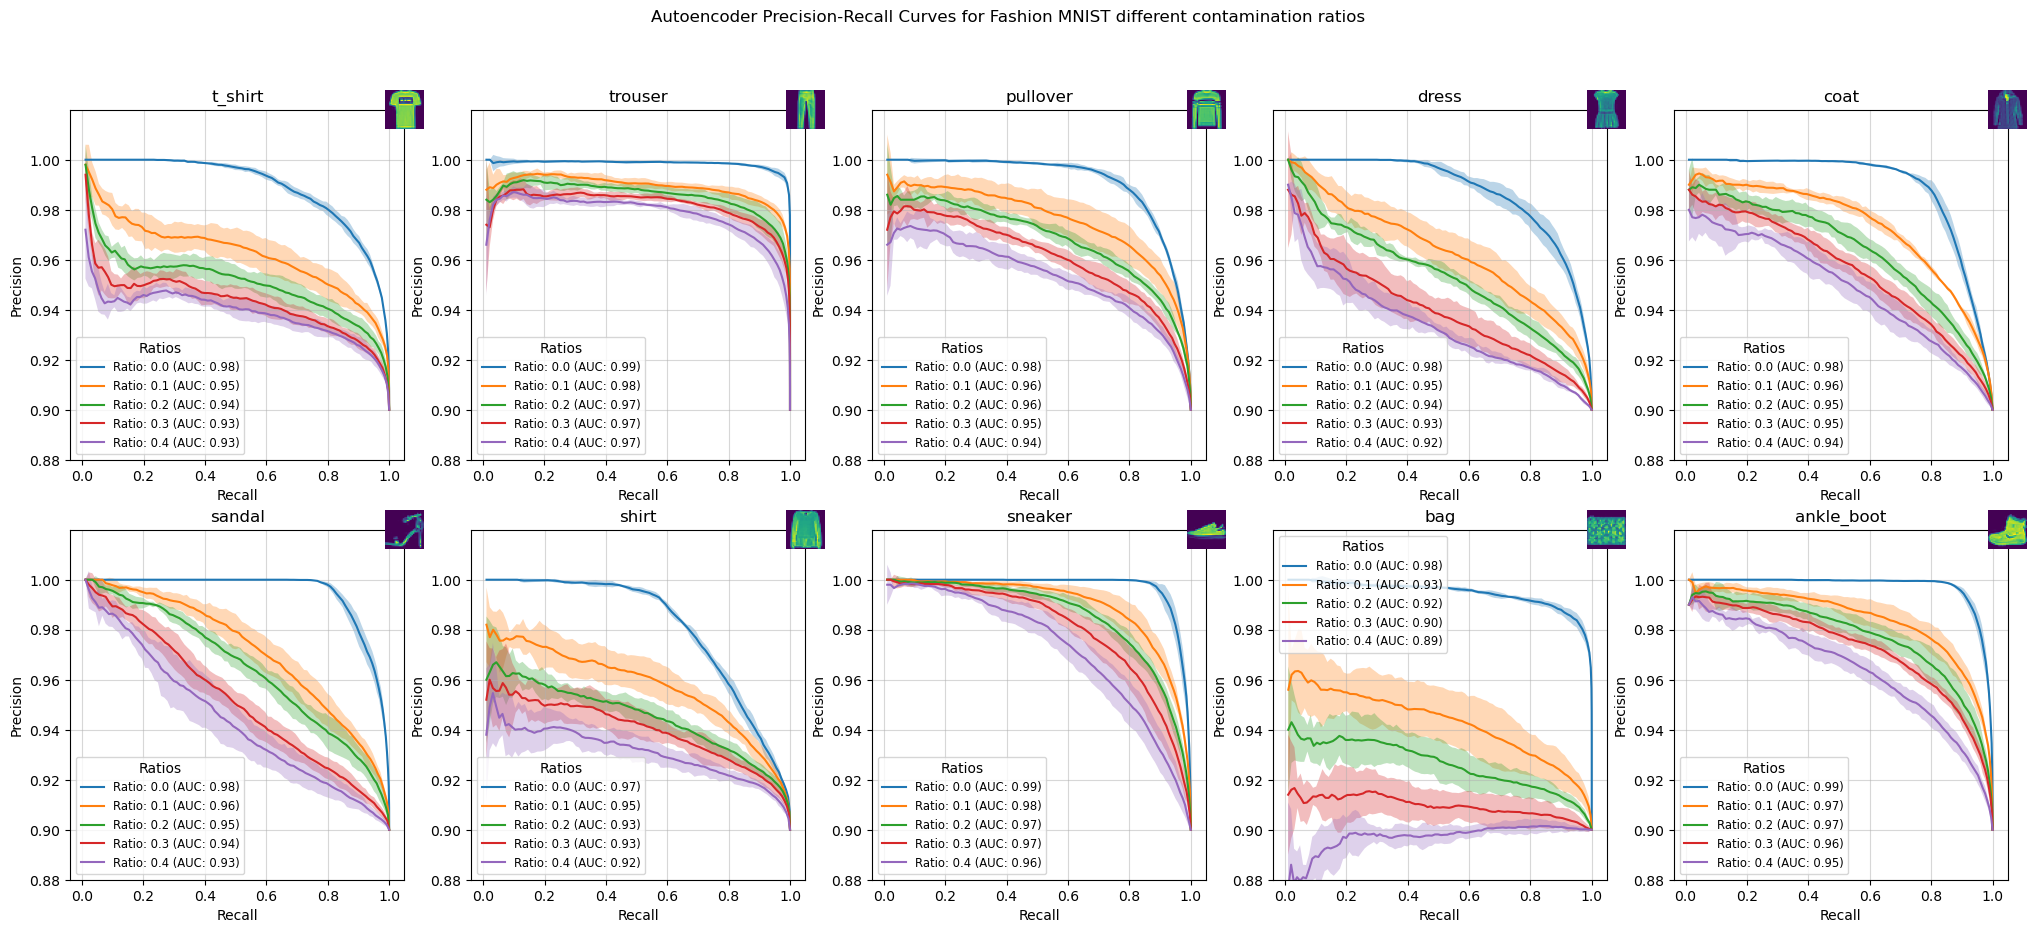

In [2]:
# comparing mutliple runs of the same model AE3
# multirun 
plt.rcParams["figure.figsize"] = (25, 10)  # Adjust the figure size as per your preference

MODEL_RESULT_PATH = Path(r"/root/LatentOE-AD/LatentOE-AD/RESULTS/fmnist\AE3")

nameslist=[name for name in os.listdir(MODEL_RESULT_PATH) if "allresults_run_"in name]
dataframe_list=[]

for name in nameslist:
    dataframe_list.append(pd.read_pickle(os.path.join(MODEL_RESULT_PATH,name)))


contam_list = [0.0, 0.1, 0.2,0.3, 0.4]

#dataframe_list:list, plot:bool=True, show_img:bool=False,contam_list:list=None,sklearn_pr:bool=None
plot_precision_recall_multi(dataframe_list,plot=True,contam_list=contam_list,show_img=True,sklearn_pr=False)

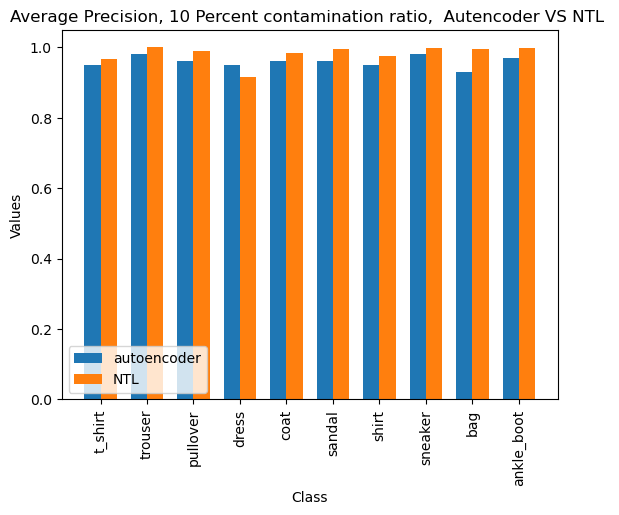

In [11]:
import matplotlib.pyplot as plt
import numpy as np
label_names = ["t_shirt", "trouser", "pullover", "dress", "coat", "sandal",
               "shirt", "sneaker", "bag", "ankle_boot"]

# Values from the dictionaries
autoencoder = {'t_shirt': 0.95, 'trouser': 0.98, 'pullover': 0.96, 'dress': 0.95, 'coat': 0.96,
              'sandal': 0.96, 'shirt': 0.95, 'sneaker': 0.98, 'bag': 0.93, 'ankle_boot': 0.97}

NTL = {'t_shirt': 0.9667887971904374, 'trouser': 0.9989608574599704, 'pullover': 0.9878835233609221,
             'dress': 0.9139598253946057, 'coat': 0.9827353418620789, 'sandal': 0.9959392792530535,
             'shirt': 0.9733544398937619, 'sneaker': 0.9976765580491347, 'bag': 0.9949437704469787,
             'ankle_boot': 0.997301328778789}

# Create a list of numbers and corresponding values
numbers = list(autoencoder.keys())
base_values = list(autoencoder.values())
ntl_values = list(NTL.values())

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(numbers))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.bar(r1, base_values, width=bar_width, label='autoencoder')
plt.bar(r2, ntl_values,  width=bar_width, label='NTL')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Values')
plt.title('Average Precision, 10 Percent contamination ratio,  Autencoder VS NTL ')

# Add x-axis tick labels
plt.xticks([r + bar_width / 2 for r in range(len(numbers))], numbers,rotation='vertical')

# Add legend
plt.legend(loc='lower left')

# Display the plot
plt.show()

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Values from the dictionaries
base_AP_10 = {'t_shirt': 0.95, '1': 0.98, '2': 0.96, '3': 0.95, '4': 0.96,
              '5': 0.96, '6': 0.95, '7': 0.98, '8': 0.93, '9': 0.97}

ntl_AP_10 = {'0': 0.9667887971904374, '1': 0.9989608574599704, '2': 0.9878835233609221,
             '3': 0.9139598253946057, '4': 0.9827353418620789, '5': 0.9959392792530535,
             '6': 0.9733544398937619, '7': 0.9976765580491347, '8': 0.9949437704469787,
             '9': 0.997301328778789}

# Create a list of labels and corresponding values
label_names = ["t_shirt", "trouser", "pullover", "dress", "coat", "sandal",
               "shirt", "sneaker", "bag", "ankle_boot"]
base_values = [base_AP_10[label] for label in label_names]
ntl_values = [ntl_AP_10[label] for label in label_names]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(label_names))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.bar(r1, base_values, color='b', width=bar_width, label='base_AP_10')
plt.bar(r2, ntl_values, color='g', width=bar_width, label='ntl_AP_10')

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Values')
plt.title('Bar Plot of Numbers per Class')

# Add x-axis tick labels
plt.xticks([r + bar_width / 2 for r in range(len(label_names))], label_names)

# Set the legend on the bottom left
plt.legend(loc='lower left')

# Display the plot
plt.show()

KeyError: 't_shirt'